In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/meteorite-landings/meteorite-landings.csv


In [2]:
data=pd.read_csv("/kaggle/input/meteorite-landings/meteorite-landings.csv")

In [3]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [4]:
print(data.shape)
print(data.dtypes)

(45716, 10)
name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object


In [5]:
data.isna().sum()/data.shape[0]*100

name            0.000000
id              0.000000
nametype        0.000000
recclass        0.000000
mass            0.286552
fall            0.000000
year            0.629976
reclat         16.000962
reclong        16.000962
GeoLocation    16.000962
dtype: float64

In [6]:
data["mass"]=data["mass"].replace(np.NAN,data["mass"].mean())

In [7]:
data["mass"].isna().sum()

0

In [8]:
data["year"]=data["year"].replace(np.NAN,data["year"].mode()[0])

In [9]:
import plotly.express as px
# plotting map using plotly
fig = px.scatter_geo(data.head(100), lat = 'reclat', lon = 'reclong', color = 'name')

# setting title for the map
fig.update_layout(title = 'Countries', title_x = 0.5)


In [10]:
df=data

In [11]:
df[df["reclong"]>180]=np.NAN
df[df["reclat"]>180]=np.NAN
df=df.dropna()

In [12]:
df.isna().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

<Axes: >

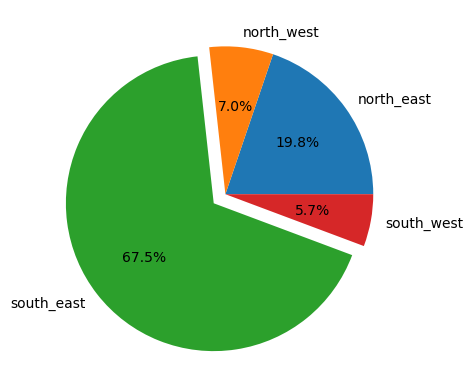

In [13]:
north_east  = df[(df['reclat'] >0) & (df['reclong'] >0)].shape[0]
north_west = df[(df['reclat'] >0) &(df['reclong'] <0)].shape[0]
south_east  = df[(df['reclat'] <0) &(df['reclong'] >0)].shape[0]
south_west  = df[(df['reclat'] <0) &(df['reclong'] <0)].shape[0]
pd.Series([north_east,north_west,south_east,south_west], index = ['north_east','north_west','south_east','south_west']).plot.pie(explode=(0, 0, 0.10,  0), autopct='%1.1f%%')

In [14]:
df["recclass"].nunique()

427

In [15]:
df.groupby('recclass').size()

recclass
Acapulcoite               38
Acapulcoite/Lodranite      5
Acapulcoite/lodranite      2
Achondrite-prim            3
Achondrite-ung            37
                        ... 
Unknown                    5
Ureilite                 214
Ureilite-an                3
Ureilite-pmict            18
Winonaite                 18
Length: 427, dtype: int64

In [16]:
df=df.drop("GeoLocation",axis=1)

In [17]:
df['region'] = ''

# Assign the region based on the 'reclat' and 'reclong' values
df.loc[(df['reclat'] > 0) & (df['reclong'] > 0), 'region'] = 'north_east'
df.loc[(df['reclat'] > 0) & (df['reclong'] < 0), 'region'] = 'north_west'
df.loc[(df['reclat'] < 0) & (df['reclong'] > 0), 'region'] = 'south_east'
df.loc[(df['reclat'] < 0) & (df['reclong'] < 0), 'region'] = 'south_west'

# Print the updated DataFrame
print(df)

             name       id nametype              recclass      mass   fall  \
0          Aachen      1.0    Valid                    L5      21.0   Fell   
1          Aarhus      2.0    Valid                    H6     720.0   Fell   
2            Abee      6.0    Valid                   EH4  107000.0   Fell   
3        Acapulco     10.0    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370.0    Valid                    L6     780.0   Fell   
...           ...      ...      ...                   ...       ...    ...   
45711  Zillah 002  31356.0    Valid               Eucrite     172.0  Found   
45712      Zinder  30409.0    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410.0    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357.0    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414.0    Valid                  L3.7     200.0  Found   

         year    reclat    reclong      region  
0      1880.0 

In [18]:
df["region"]=df["region"].replace('',"center")

In [19]:
df["region"].unique()

array(['north_east', 'north_west', 'south_west', 'center', 'south_east'],
      dtype=object)

In [20]:
df=df.drop("reclat",axis=1)
df=df.drop("reclong",axis=1)

In [21]:
df=df.drop("name",axis=1)
df=df.drop("recclass",axis=1)

In [22]:
df=df.drop("nametype",axis=1)


In [23]:
df=df.drop("id",axis=1)

In [24]:
df.head()

,mass,fall,year,region
0,21.0,Fell,1880.0,north_east
1,720.0,Fell,1951.0,north_east
2,107000.0,Fell,1952.0,north_west
3,1914.0,Fell,1976.0,north_west
4,780.0,Fell,1902.0,south_west


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["region"]=le.fit_transform(df["region"])

In [26]:
df.head()

,mass,fall,year,region
0,21.0,Fell,1880.0,1
1,720.0,Fell,1951.0,1
2,107000.0,Fell,1952.0,2
3,1914.0,Fell,1976.0,2
4,780.0,Fell,1902.0,4


In [27]:
from sklearn.model_selection import train_test_split
df=df.drop("fall",axis=1)
X=df.drop("region",axis=1)
y=df["region"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.97861328125
0.7407552083333333


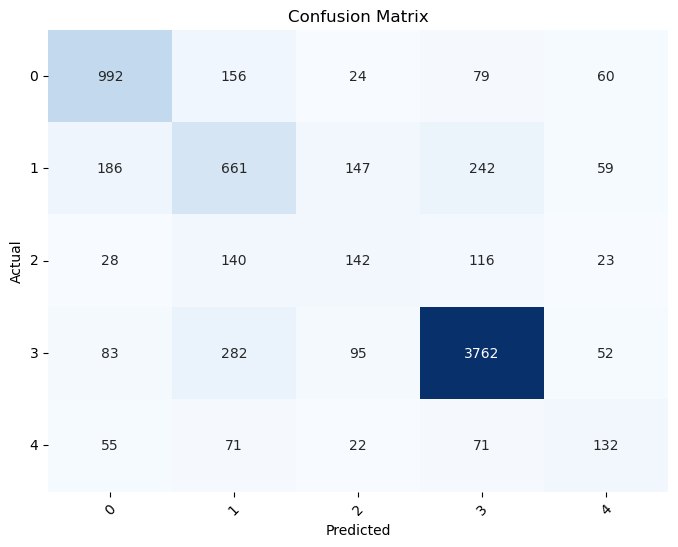

In [29]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
y_pred=dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Set axis labels and title
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")


# Rotate tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.9785807291666667
0.7506510416666666


In [31]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier()
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the XGBoost model with the best parameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters, best score, and accuracy
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)
print("Accuracy: ", accuracy)

Best Parameters:  {'gamma': 0.1, 'learning_rate': 0.1}
Best Score:  0.8009114583333332
Accuracy:  0.8001302083333334


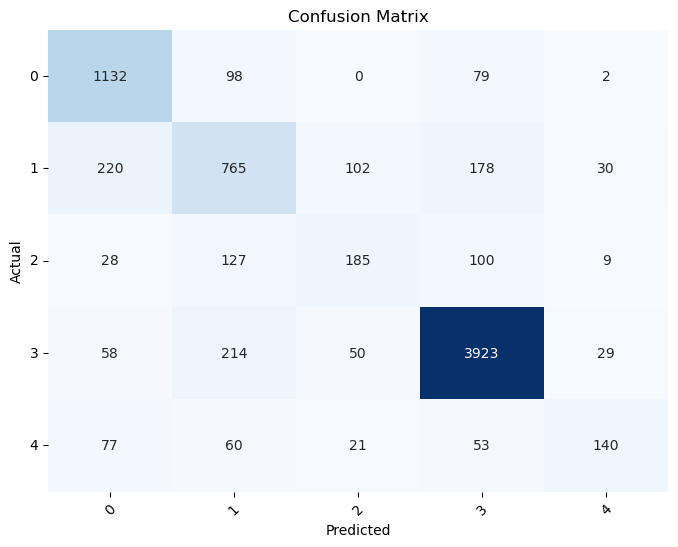

In [32]:
y_pred=best_model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Set axis labels and title
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")


# Rotate tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()